In [1]:
from os import walk
import numpy as np
import cv2
import scipy as scipy
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from astropy.io import fits
import polarTransform
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import wasserstein_distance

from marvin.tools import Maps

from tqdm import tqdm
import Bicone_Classifier


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


## Iterate through the galaxies

HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v2.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

result_list = []

for data in tqdm(plateifu):
    try:
        plateifu = data
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)
        yf = np.abs(fft(BC_EW_hist-0.5)[1:50])
        if yf[1] <= 60 and yf[5] <= 45:
            result_list.append(data)
        else:
            pass
    except:
        pass

In [ ]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v2.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

result_list = []

for data in tqdm(plateifu):
    plateifu = data
    BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)
    yf = np.abs(fft(BC_EW_hist[0]-0.5)[1:50])
    if yf[1] <= 60 and yf[5] <= 45:
        result_list.append(data)
    else:
        pass

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v2.fits' mode='rb' closefd=True> (ResourceWarning)
  1%|          | 17/2103 [00:16<34:04,  1.02it/s]

## Check the length of the list and save to a .fits file

In [12]:
len(result_list)

3

In [7]:
c1 = fits.Column(name='plateifu', array=np.array(result_list), format='20A')
t = fits.BinTableHDU.from_columns([c1])
t.writeto('bicone_candidates_v2.fits')

## Plot some galaxies in the file

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v2.fits' mode='rb' closefd=True> (ResourceWarning)


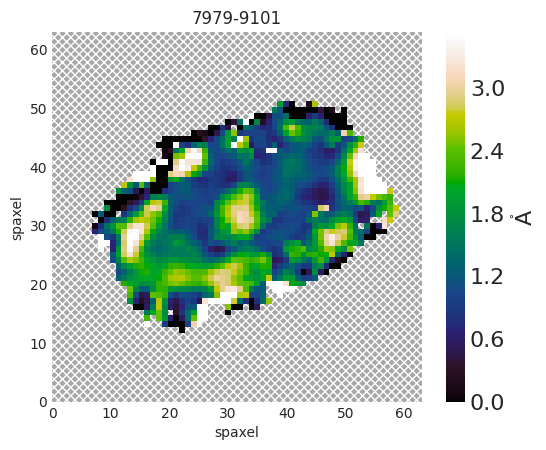

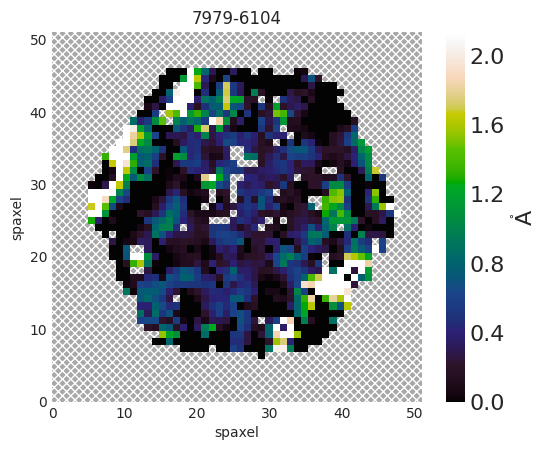

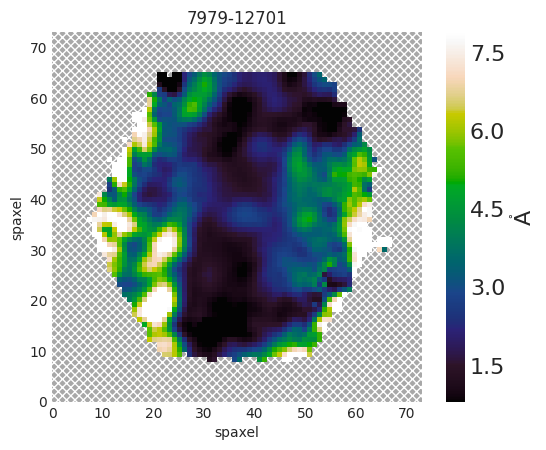

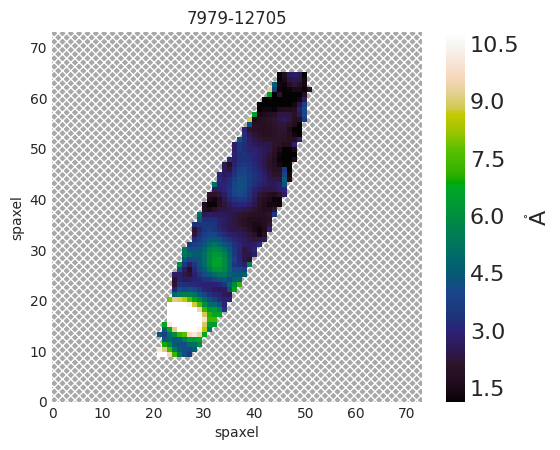

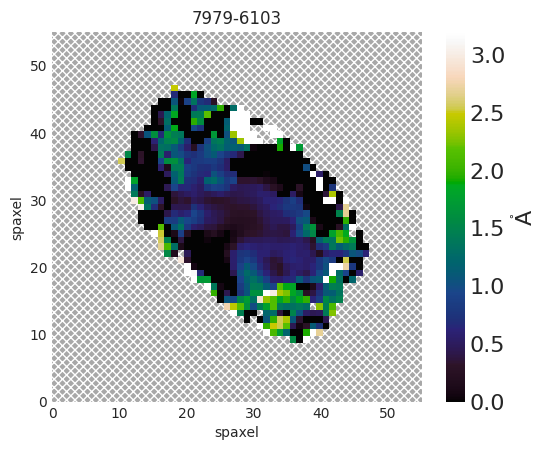

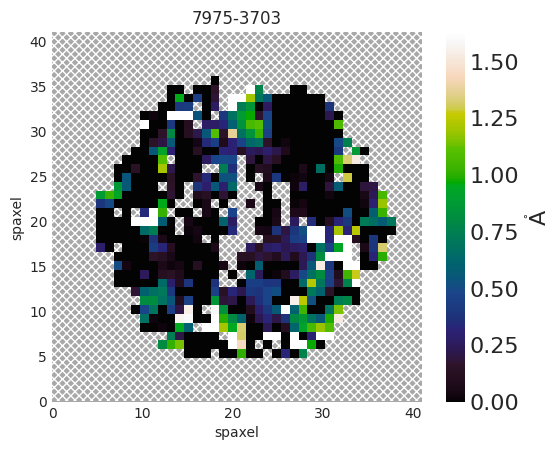

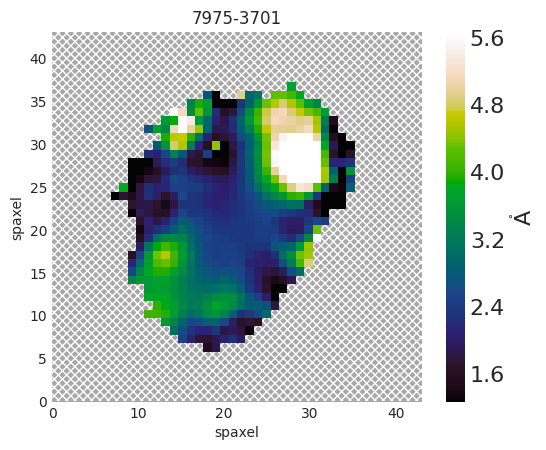

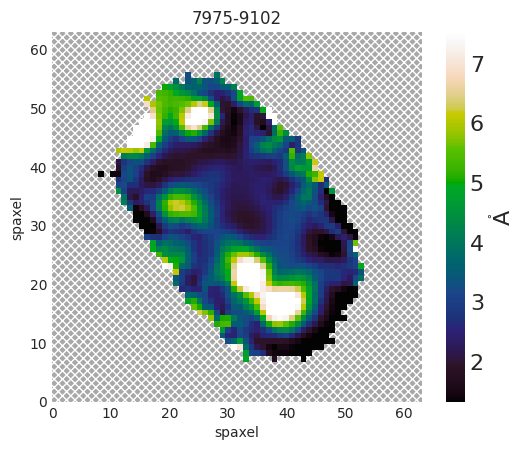

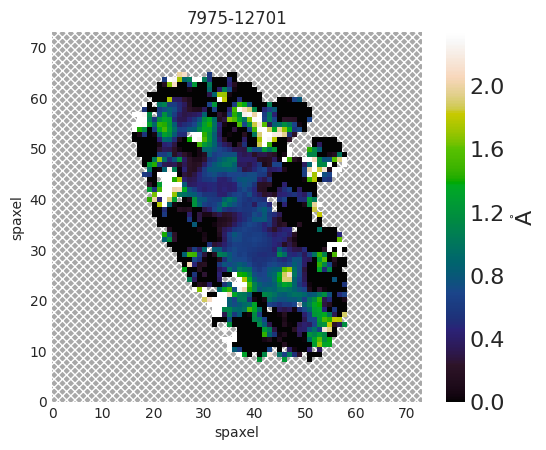

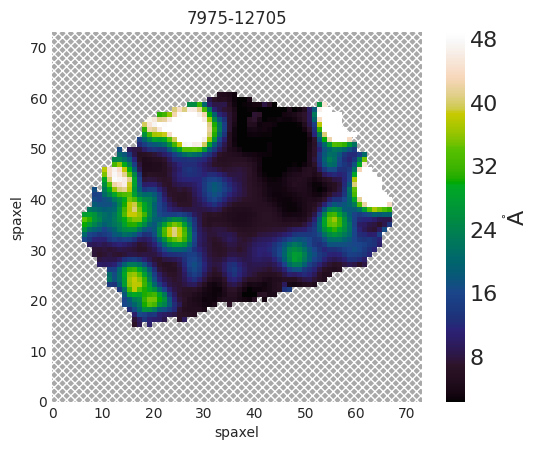

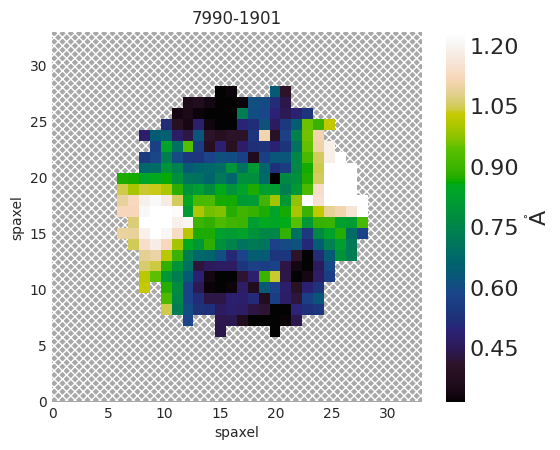

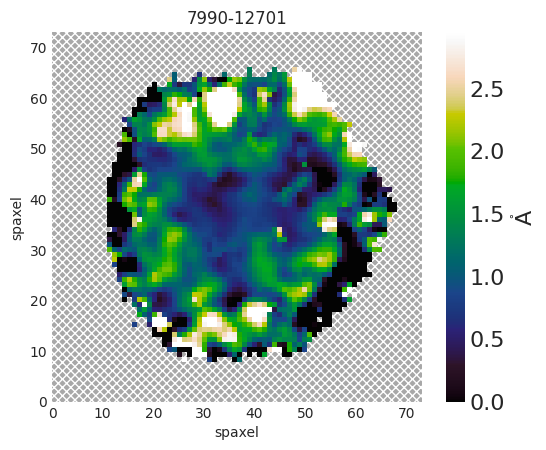

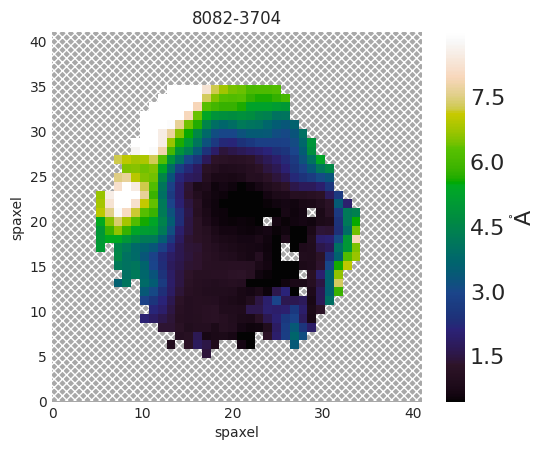

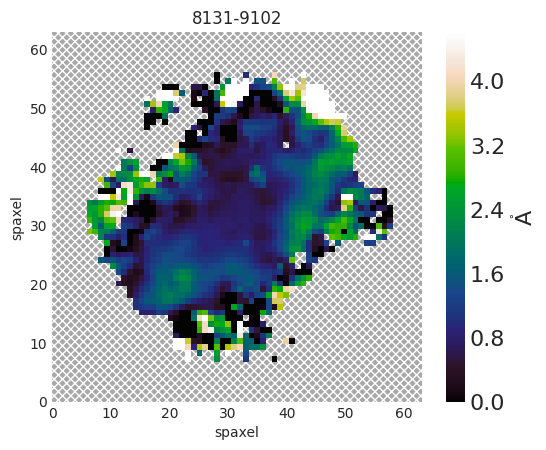

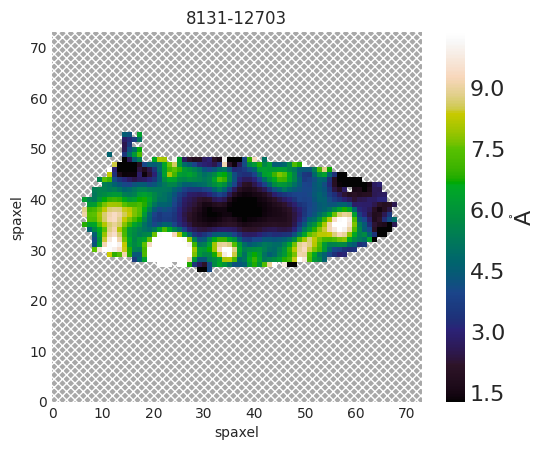

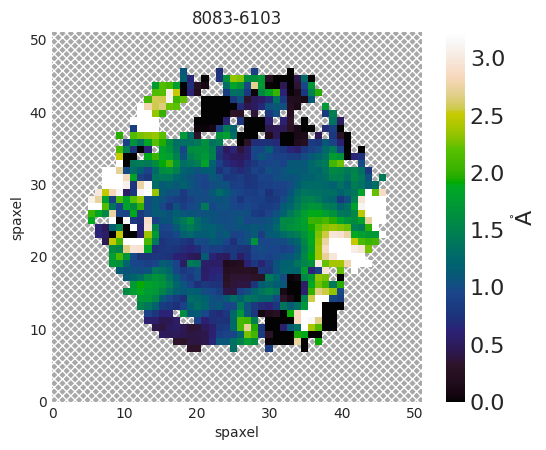

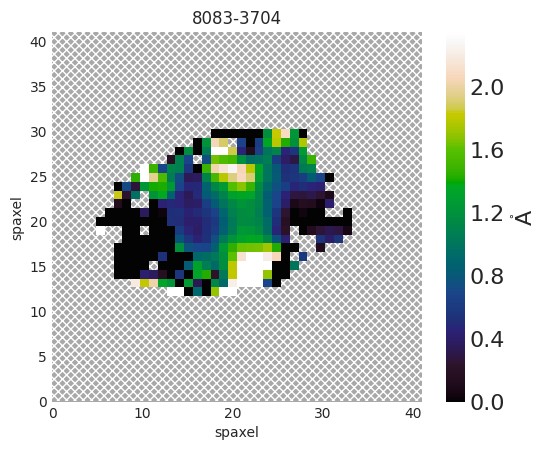

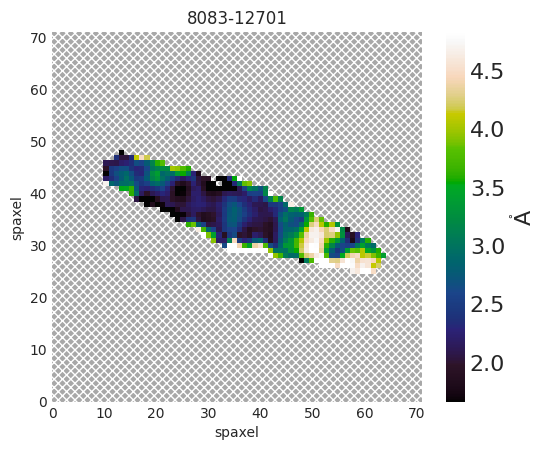

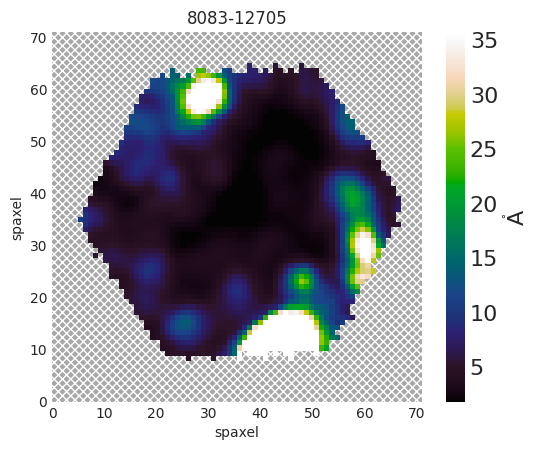

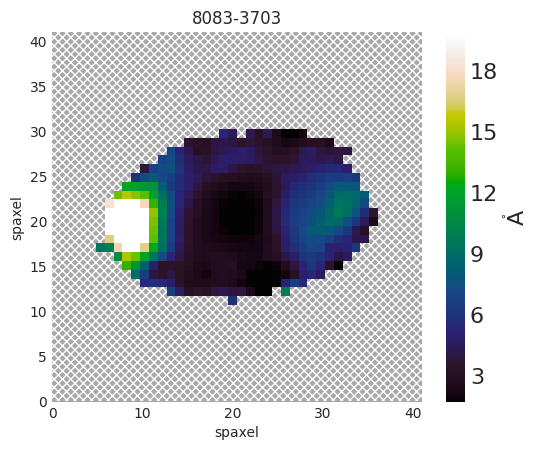

In [11]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v2.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

for i in plateifu[20:40]:
    maps = Maps(i, bintype='SPX', template='MILESHC-MASTARSSP')
    oiii_ew = maps.emline_gew_oiii_5008
    oiii_ew.plot(title = i, snr_min = None)
    plt.show()

HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_FULL.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

# loop through the length of tickers and keep track of index
for n, i in enumerate(plateifu[100:120]):
    # add a new subplot iteratively
    ax = plt.subplot(5, 4, n+1)
    maps = Maps(i, bintype='SPX', template='MILESHC-MASTARSSP')
    oiii_ew = maps.emline_gew_oiii_5008
    oiii_ew.plot(fig = fig, ax = axes [n%4-1,n%5-1], snr_min = None)
    
#Adjusting plot spaceing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()